In [9]:
# 📌 Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Load the dataset
df = pd.read_csv('co-emissions-per-capita new.csv')

# 📌 Preview the dataset
print(df.head())
print(df.info())


                         Entity  Year Annual CO₂ emissions (per capita)
0                        Africa  1750                                 0
1                       Andorra  1750                                 0
2                          Asia  1750                                 0
3  Asia (excl. China and India)  1750                                 0
4                     Australia  1750                                 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26600 entries, 0 to 26599
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Entity                             26600 non-null  object
 1   Year                               26600 non-null  int64 
 2   Annual CO₂ emissions (per capita)  26600 non-null  object
dtypes: int64(1), object(2)
memory usage: 623.6+ KB
None


In [10]:
# 📌 Drop columns with too many nulls or irrelevant
df.dropna(axis=1, thresh=len(df) * 0.6, inplace=True)

# 📌 Check for missing values
print(df.isnull().sum())

# 📌 Fill numeric columns with mean
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

# 📌 Remove duplicate rows if any
df.drop_duplicates(inplace=True)

Entity                               0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64


23533


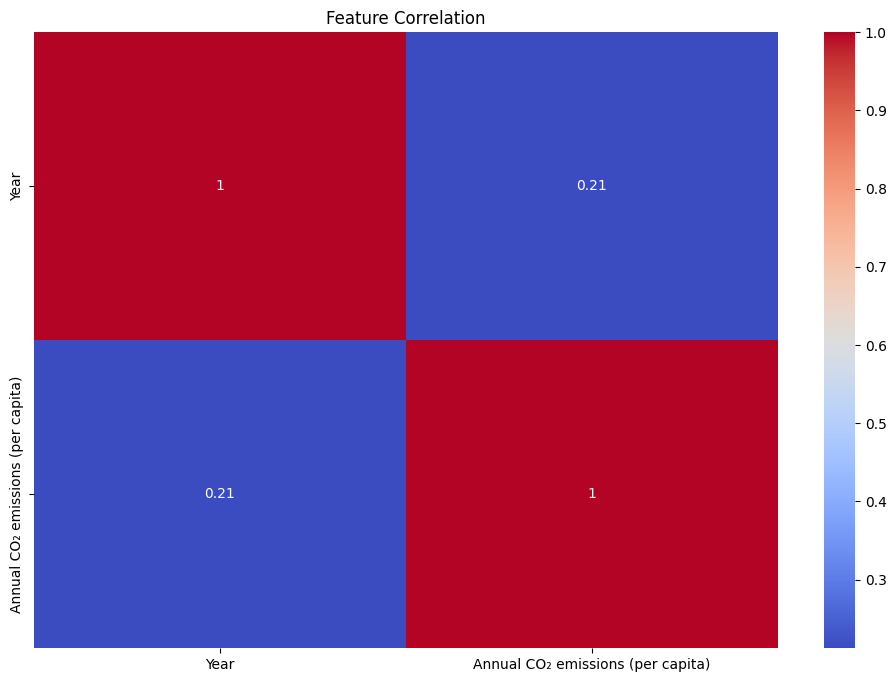

In [11]:
# Convert 'Annual CO₂ emissions (per capita)' to numeric, coercing errors
df['Annual CO₂ emissions (per capita)'] = pd.to_numeric(df['Annual CO₂ emissions (per capita)'], errors='coerce')

# Check for missing values in the converted column
print(df['Annual CO₂ emissions (per capita)'].isnull().sum())

# Fill missing values with the mean
df['Annual CO₂ emissions (per capita)'] = df['Annual CO₂ emissions (per capita)'].fillna(df['Annual CO₂ emissions (per capita)'].mean())

# Remove non-numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [12]:
y = df['Annual CO₂ emissions (per capita)']


In [13]:
print(df.columns)


Index(['Entity', 'Year', 'Annual CO₂ emissions (per capita)'], dtype='object')


In [26]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. Load your dataset
df = pd.read_csv('co-emissions-per-capita new.csv')

# 3. Clean any nulls
df.dropna(axis=1, thresh=len(df)*0.6, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

# 4. Define features and target
target_column = 'Annual CO₂ emissions (per capita)'  # Make sure this column name is correct
X = df.drop(columns=[target_column])
y = df[target_column]

# 5. One-hot encoding (if any categorical columns exist)
X = pd.get_dummies(X)

# 6. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled is defined!




/tmp/ipython-input-29-2974183758.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[target_column].fillna(df[target_column].mean(), inplace=True)


✅ Using target column: Annual CO₂ emissions (per capita)
✅ MAE: 23.25, R²: -0.10


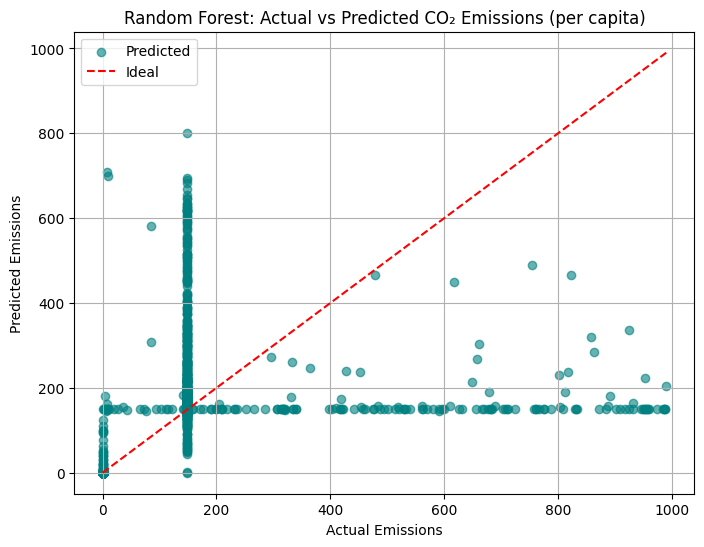

In [29]:
# 📌 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 📌 Load and clean dataset
df = pd.read_csv('co-emissions-per-capita new.csv')
df.columns = df.columns.str.strip()  # Remove extra spaces
df.dropna(axis=1, thresh=len(df)*0.6, inplace=True)

# Convert target column to numeric before one-hot encoding
target_column = 'Annual CO₂ emissions (per capita)'
df[target_column] = pd.to_numeric(df[target_column], errors='coerce')
df[target_column].fillna(df[target_column].mean(), inplace=True)


# 📌 Auto-detect target column
# target_column = None
# for col in df.columns:
#     if 'emission' in col.lower() and 'capita' in col.lower():
#         target_column = col
#         break

# if target_column is None:
#     raise Exception("❌ Target column not found!")

print(f"✅ Using target column: {target_column}")

# 📌 Encode categorical columns
df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns)

# 📌 Features and Target
X = df.drop(columns=[target_column])
y = df[target_column]

# 📌 Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 Predict
y_pred = model.predict(X_test)

# 📌 Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"✅ MAE: {mae:.2f}, R²: {r2:.2f}")

# 📌 Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Random Forest: Actual vs Predicted CO₂ Emissions (per capita)")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
print(X_train.dtypes)


Year                        int64
Entity_Afghanistan           bool
Entity_Africa                bool
Entity_Albania               bool
Entity_Algeria               bool
                            ...  
Entity_Wallis and Futuna     bool
Entity_World                 bool
Entity_Yemen                 bool
Entity_Zambia                bool
Entity_Zimbabwe              bool
Length: 232, dtype: object


In [34]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


532/532 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 18638.0430 - mae: 91.4461 - val_loss: 8541.6924 - val_mae: 35.4563
Epoch 2/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7863.8018 - mae: 32.6872 - val_loss: 8529.3428 - val_mae: 37.9173
Epoch 3/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7798.7432 - mae: 33.5393 - val_loss: 8469.0957 - val_mae: 35.5838
Epoch 4/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8269.8379 - mae: 34.8580 - val_loss: 8493.3809 - val_mae: 32.6732
Epoch 5/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7422.8877 - mae: 32.0001 - val_loss: 8496.2422 - val_mae: 34.5975
Epoch 6/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8476.0605 - mae: 34.7242 - val_loss: 8455.5176 - val_mae: 34.1040
Epoch 7/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7139.4800 - mae: 31.6878 - val_loss: 8487.5186 - val_mae: 33.8864
Epoch 8/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7946.0557 - mae: 33.3792 - val_loss: 8394.9443 - val_mae: 33.

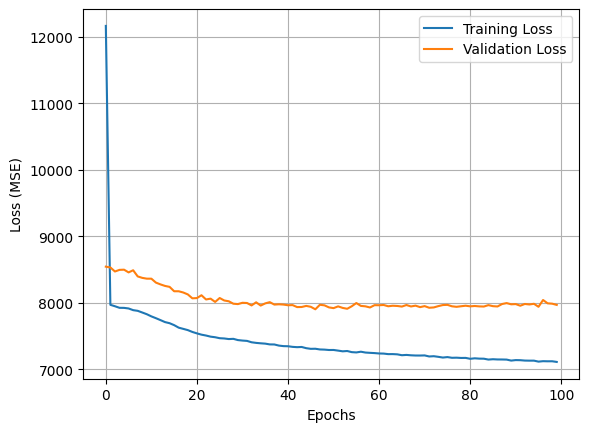

In [35]:
# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# TensorFlow model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Plot training/validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()
